<a href="https://colab.research.google.com/github/corochena/projecteuler/blob/main/pe_84_Monopoly_odds_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

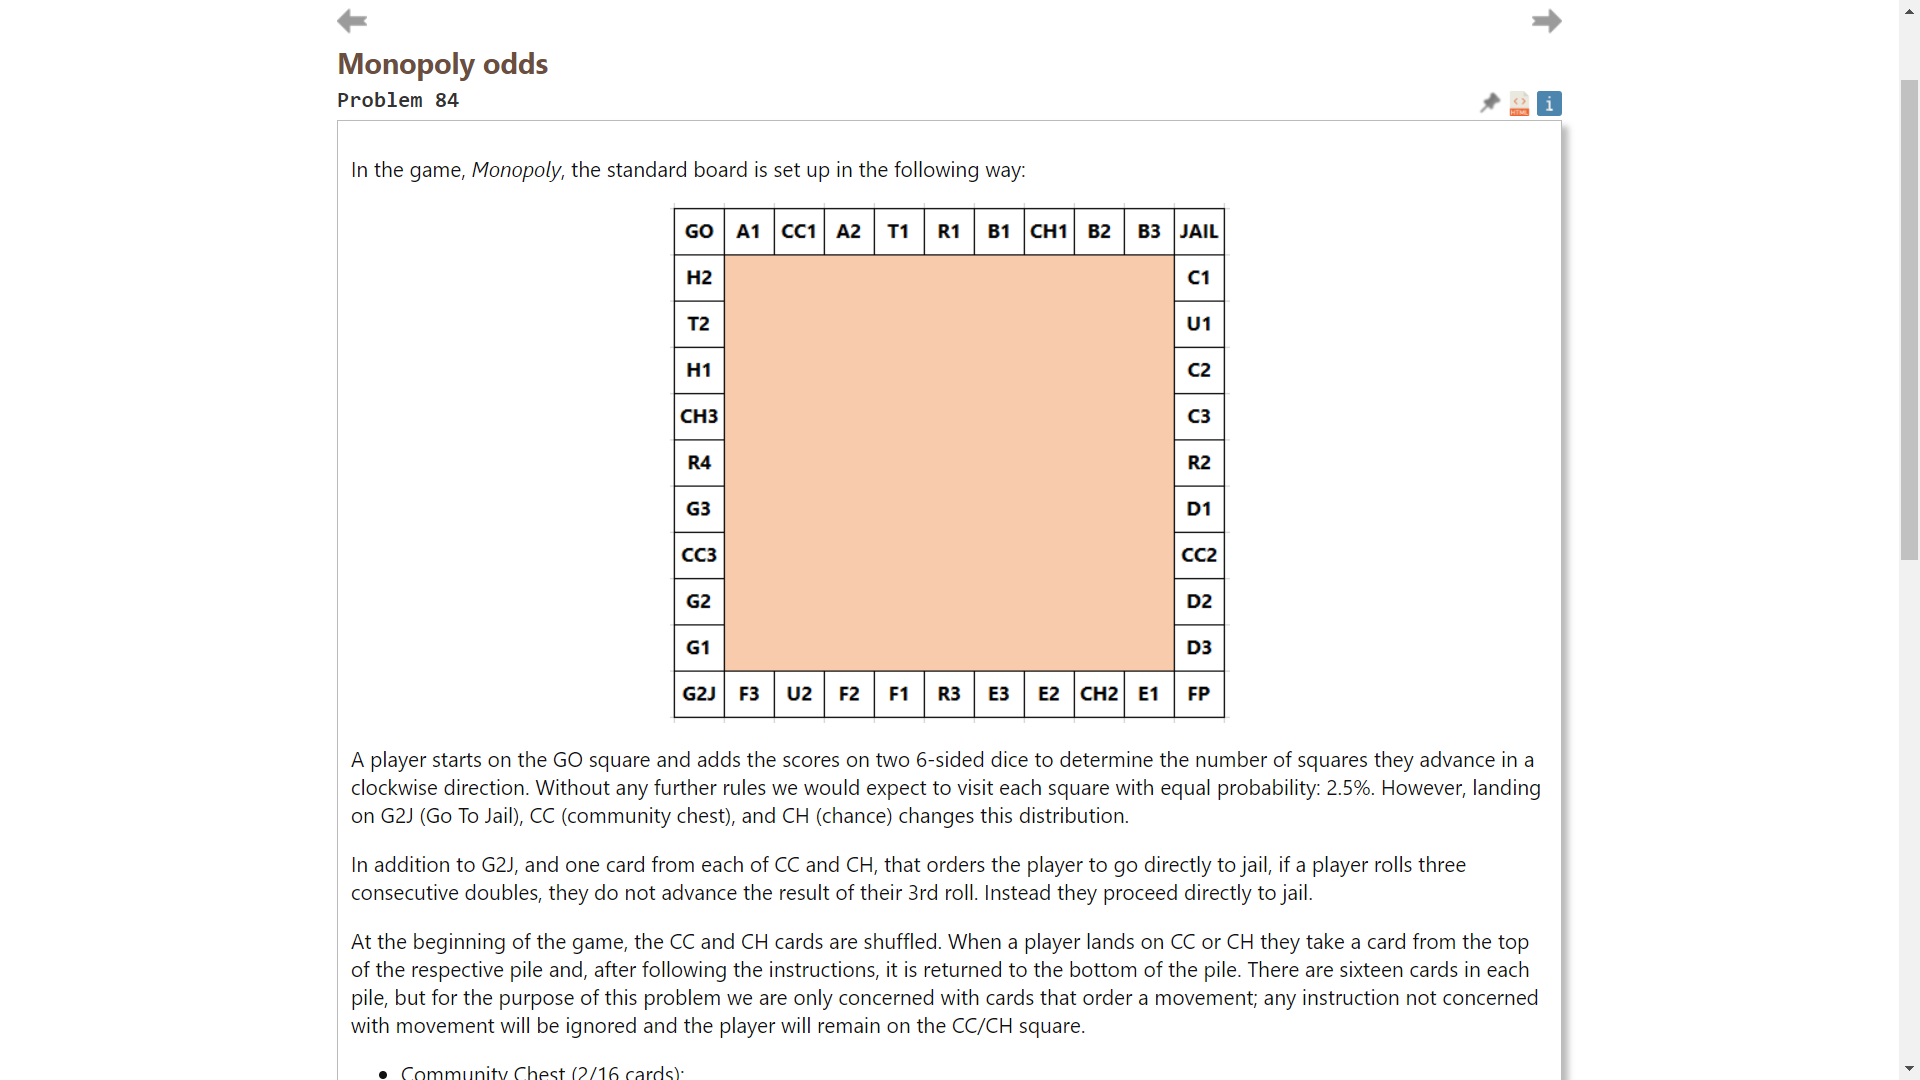

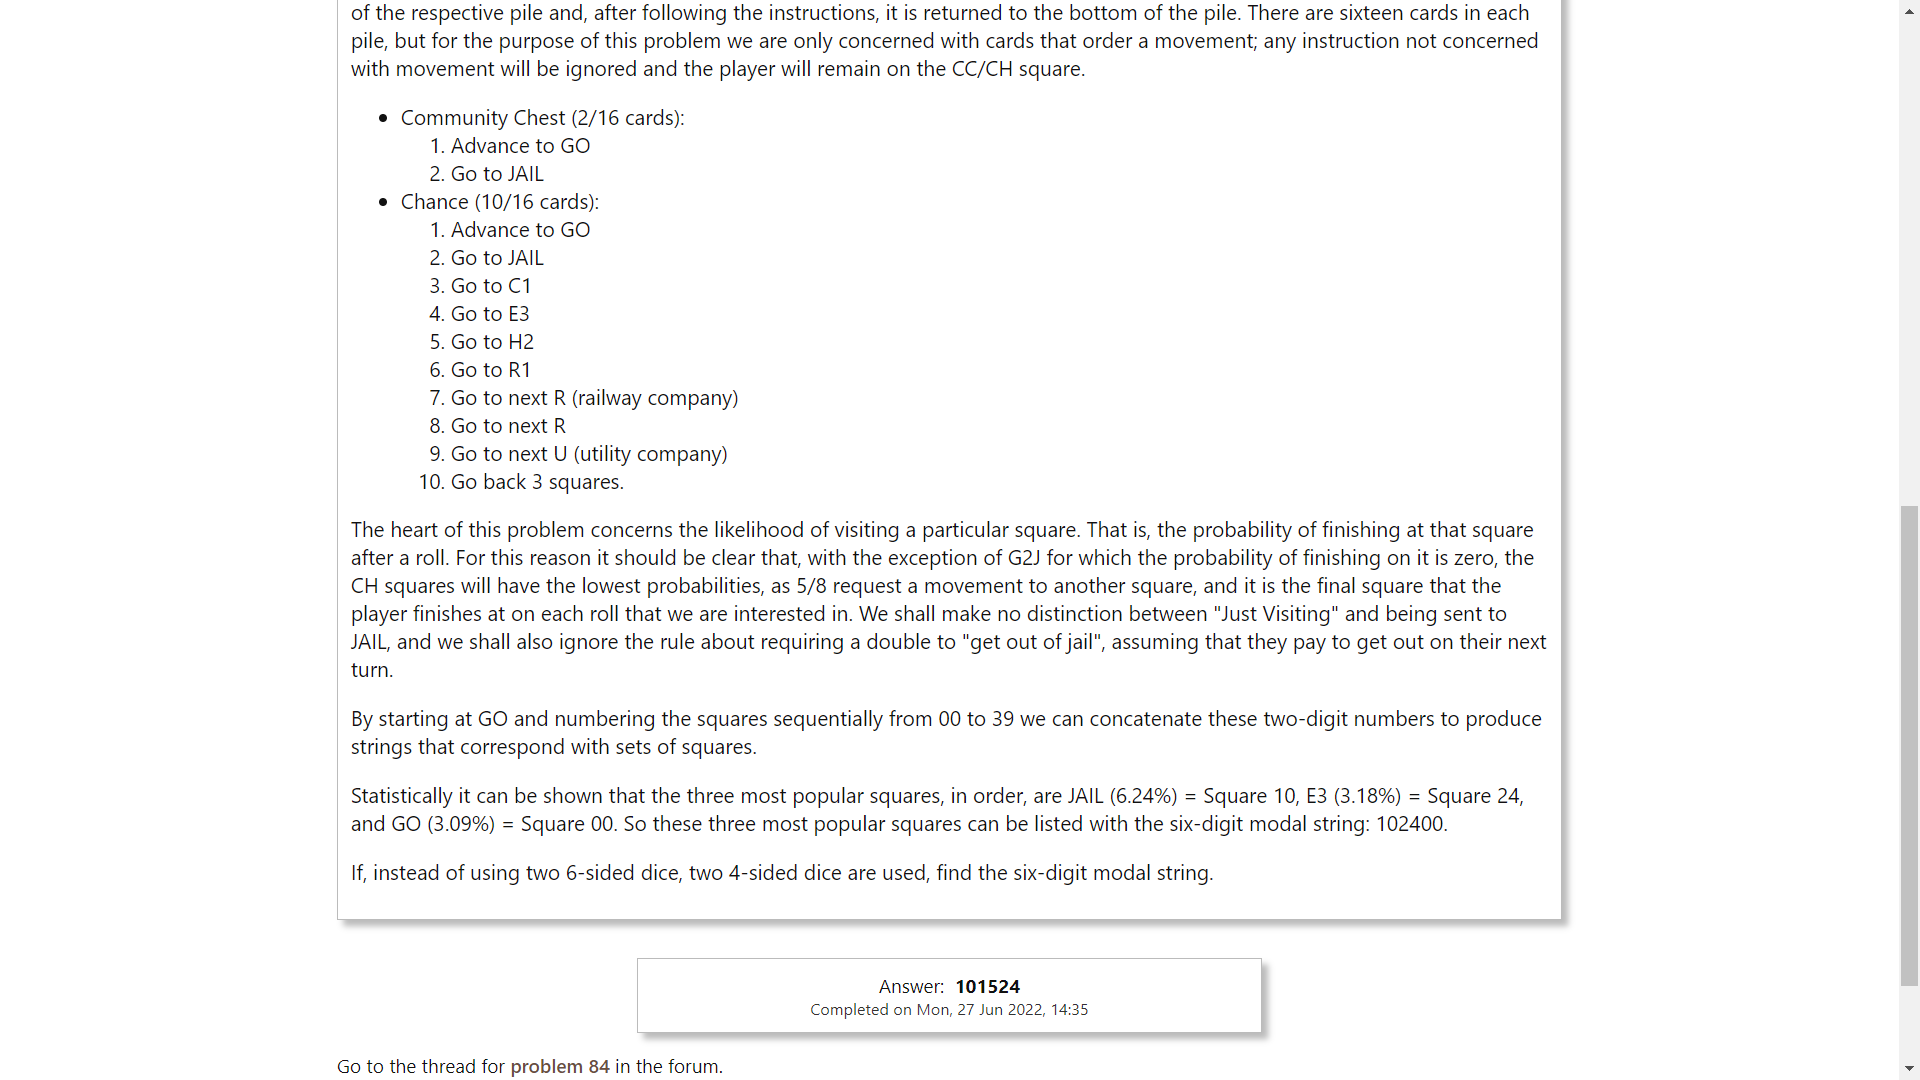

In [ ]:
import random

squares = 'GO,A1,CC1,A2,T1,R1,B1,CH1,B2,B3,JAIL,C1,U1,C2,C3,R2,D1,CC2,D2,D3,FP,E1,CH2,E2,E3,R3,F1,F2,U2,F3,G2J,G1,G2,CC3,G3,R4,CH3,H1,T2,H2'
squares = squares.split(',')

cclist = ['GO', 'JAIL'] + ['']*14
chlist = ['GO','JAIL','C1','E3','H2','R1','NEXT R','NEXT R','NEXT U','BACK 3'] + ['']*6
random.shuffle(cclist)
random.shuffle(chlist)

diceRolls = 10000000
diceSize = 6 # change to diceSize = 4 to get the answer
position = -1
hits = [0] * len(squares)
numPairs = 0

lastTry = False
lastlastTry = False
howmanyrepstojail = 0

for i in range(diceRolls):
  dice1 = random.randrange(1, diceSize + 1)
  dice2 = random.randrange(1, diceSize + 1)
  if dice1 == dice2:
    if lastlastTry == True:
      howmanyrepstojail += 1
      position = 10
      hits[position] += 1
      lastTry = False
      lastlastTry = False
      continue
    if lastTry:
      lastlastTry = True
    else:
      lastTry = True
  else:
    lastTry = False
    lastlastTry = False

  moveLen = dice1 + dice2
  position += moveLen
  position = position % 40
  
  if squares[position] == 'G2J':
    position = 10
  if squares[position][0:2] == 'CC':
    card = cclist.pop(0)
    cclist.append(card)
    if card == 'GO':
      position = 0
    if card == 'JAIL':
      position = 10
  if squares[position][0:2] == 'CH':
    card = chlist.pop(0)
    chlist.append(card)
    if card not in ['BACK 3', 'NEXT R', 'NEXT U', '']:
      position = squares.index(card)
    elif card == 'BACK 3':
      position -= 3
    elif card == 'NEXT R':
      if position == 7:
        position = 15
      if position == 22:
        position = 25
      if position == 36:
        position = 5
    elif card == 'NEXT U':
      if position == 22:
        position = 28
      else:
        position = 12

  hits[position] += 1

print(howmanyrepstojail, list(zip(hits, squares)))

hitsSorted = sorted(hits, reverse=True)[0:3]
for freq in hitsSorted:
  idx = hits.index(freq)
  print('%.2f' % (freq / diceRolls * 100), idx, squares[idx])

# print(cclist, chlist)
# print(numPairs, dice1, dice2, position, squares[position])




38866 [(308475, 'GO'), (213304, 'A1'), (188161, 'CC1'), (216313, 'A2'), (233515, 'T1'), (296211, 'R1'), (227088, 'B1'), (83845, 'CH1'), (231459, 'B2'), (230140, 'B3'), (623948, 'JAIL'), (269154, 'C1'), (261511, 'U1'), (237162, 'C2'), (246318, 'C3'), (292435, 'R2'), (279247, 'D1'), (260127, 'CC2'), (292500, 'D2'), (308339, 'D3'), (288028, 'FP'), (284145, 'E1'), (105102, 'CH2'), (272813, 'E2'), (318503, 'E3'), (306002, 'R3'), (271329, 'F1'), (268017, 'F2'), (279408, 'U2'), (259051, 'F3'), (0, 'G2J'), (267524, 'G1'), (261553, 'G2'), (237360, 'CC3'), (249885, 'G3'), (242929, 'R4'), (88860, 'CH3'), (219059, 'H1'), (218577, 'T2'), (262603, 'H2')]
6.24 10 JAIL
3.19 24 E3
3.08 0 GO
